<a href="https://colab.research.google.com/github/mohtashim0007/Machine-Learning-Projects/blob/main/IPL_EDA_DashBoard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IPL EDA DashBoard : In depth Analysis of IPL data between 2008-2020, do explore my Project [Click Here](https://mohtashim0007-ipl-data-analysis-main-7vqu37.streamlitapp.com/)

HIGHLIGHTED FEATURES : 
There 3 main features in the website

1.   DREAM 11 Team Recommendation using ML
2.   In depth Matches analysis between two teams.
3.   In depth Players analysis

Project brief -

1.   DREAM 11 Team Recomendation. Select two IPL Teams and this feature will recommend you best top 11 players from both the teams based on their previous performances and statistical calculations. It also calculate the team1 batsman and bowlers performance against team2, so that we can also manually choose our best DREAM 11 Players.
2.   Cosine similarity based Similar players. Select you favourite players to view the performance, it will also show you the 5 similar players calculated usng Cosine similarity.
3.   Graphs and table. For better understanding and visualising I have used Seaborn and matplotlib plots.
4.    In depth comparison of two IPL Teams along with win percentages and graphs.




In [326]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import pickle
fig_colors = ['Set1', 'Set2', 'Set3', 'tab10' ,'deep', 'hls', 'husl', 'rocket_r', 'YlOrBr', 'Spectral']

In [327]:
np.random.choice(fig_colors)

'rocket_r'

In [328]:
df_matches = pd.read_csv('/content/drive/My Drive/DataSet/IPL Matches 2008-2020.csv')
df_matches.head(5)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [329]:
df_matches.shape

(816, 17)

In [330]:
df_matches.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')

In [331]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [332]:
#date columns modify from '2008-08-13' to only year ''2008

df = df_matches
date_list = df['date'].tolist()
date_list[8][0:4]


'2008'

In [333]:
for i in range(len(date_list)):
  date_list[i] = date_list[i][0:4]
df['date'] = date_list


In [334]:
df_matches = df

In [335]:
df = df_matches
date_list = df['date'].tolist()
for i in range(len(date_list)):
  date_list[i] = date_list[i][0:4]
df['date'] = date_list
df_matches = df

# Players who won maximum number of times Man of the Match 

In [336]:
MoM = df_matches['player_of_match'].value_counts()
print(MoM[0:5])
print(MoM['CH Gayle'])

AB de Villiers    23
CH Gayle          22
RG Sharma         18
DA Warner         17
MS Dhoni          17
Name: player_of_match, dtype: int64
22


In [337]:
mom_df = pd.DataFrame(data=MoM[0:5], columns=['Player Name', 'MoM won'])
mom_df

,Player Name,MoM won


In [338]:
MoM_names = MoM[0:5].index.tolist()
MoM_names

['AB de Villiers', 'CH Gayle', 'RG Sharma', 'DA Warner', 'MS Dhoni']

In [339]:
Mom_values = MoM[0:5].tolist()
Mom_values

[23, 22, 18, 17, 17]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

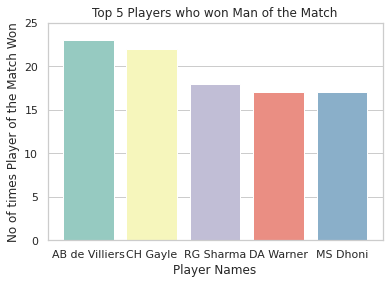

In [340]:
sns.barplot(MoM[0:5].index.tolist(), MoM[0:5].tolist(),palette = np.random.choice(fig_colors))
plt.ylabel('No of times Player of the Match Won')
plt.xlabel('Player Names')
plt.title('Top 5 Players who won Man of the Match')
plt.ylim(0,25)
plt.plot()

# No. of Matches won by each team

In [341]:
matches_won_by_each_team = df_matches['winner'].value_counts()
matches_won_by_each_team

Mumbai Indians                 120
Chennai Super Kings            106
Kolkata Knight Riders           99
Royal Challengers Bangalore     91
Kings XI Punjab                 88
Rajasthan Royals                81
Delhi Daredevils                67
Sunrisers Hyderabad             66
Deccan Chargers                 29
Delhi Capitals                  19
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

In [342]:
#merging teams win delhi capital or daredavils
matches_won_by_each_team['Delhi Daredevils'] = matches_won_by_each_team['Delhi Daredevils'] + matches_won_by_each_team['Delhi Capitals']
matches_won_by_each_team['Delhi Daredevils']

86

In [343]:
matches_won_by_each_team['Pune Warriors'] = matches_won_by_each_team['Pune Warriors'] + matches_won_by_each_team['Rising Pune Supergiant'] +matches_won_by_each_team['Rising Pune Supergiants']
matches_won_by_each_team['Pune Warriors']

27

In [344]:
#dropping merged index
matches_won_by_each_team.drop(index=['Rising Pune Supergiants', 'Rising Pune Supergiant','Delhi Capitals' ], inplace=True)

In [345]:
matches_won_by_each_team

Mumbai Indians                 120
Chennai Super Kings            106
Kolkata Knight Riders           99
Royal Challengers Bangalore     91
Kings XI Punjab                 88
Rajasthan Royals                81
Delhi Daredevils                86
Sunrisers Hyderabad             66
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   27
Kochi Tuskers Kerala             6
Name: winner, dtype: int64

In [346]:
#reanming index name
matches_won_by_each_team.rename(index = {'Delhi Daredevils' : 'Delhi Daredevils/Capitals', 'Pune Warriors' : 'Pune Warriors/Rising Pune Supergiants'}, inplace = True)

In [347]:
matches_won_by_each_team

Mumbai Indians                           120
Chennai Super Kings                      106
Kolkata Knight Riders                     99
Royal Challengers Bangalore               91
Kings XI Punjab                           88
Rajasthan Royals                          81
Delhi Daredevils/Capitals                 86
Sunrisers Hyderabad                       66
Deccan Chargers                           29
Gujarat Lions                             13
Pune Warriors/Rising Pune Supergiants     27
Kochi Tuskers Kerala                       6
Name: winner, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


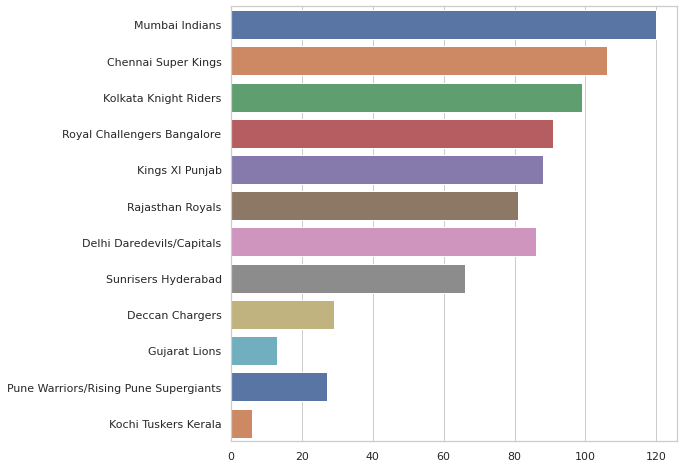

In [348]:
fig = plt.figure(figsize=(8,8))
sns.barplot(  matches_won_by_each_team[:].tolist(),matches_won_by_each_team.index.tolist(), orient = 'h', palette = np.random.choice(fig_colors))
plt.show()
fig.savefig('matches_won_by_each_team_barplot.jpg')

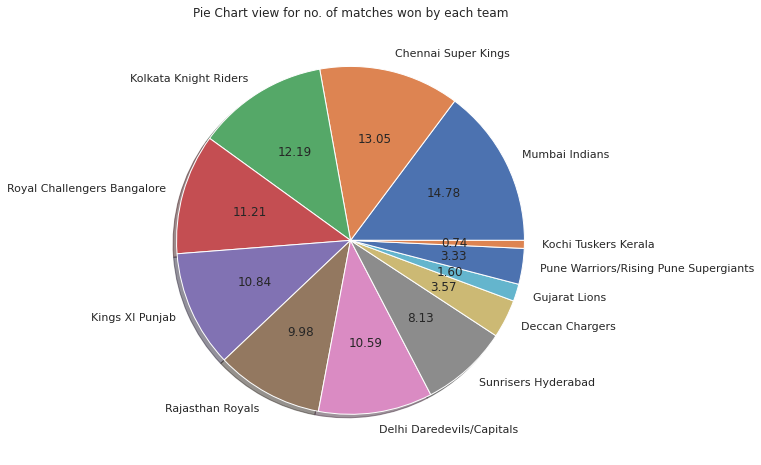

In [349]:
fig = plt.figure(figsize=(8,8))
plt.pie(matches_won_by_each_team[:],labels = matches_won_by_each_team.index.tolist(), autopct='%.2f', shadow= True)
plt.title('Pie Chart view for no. of matches won by each team')
plt.show()
fig.savefig('matches_won_by_each_team_pieChart.jpg')

# Matches Umpired by Umpires

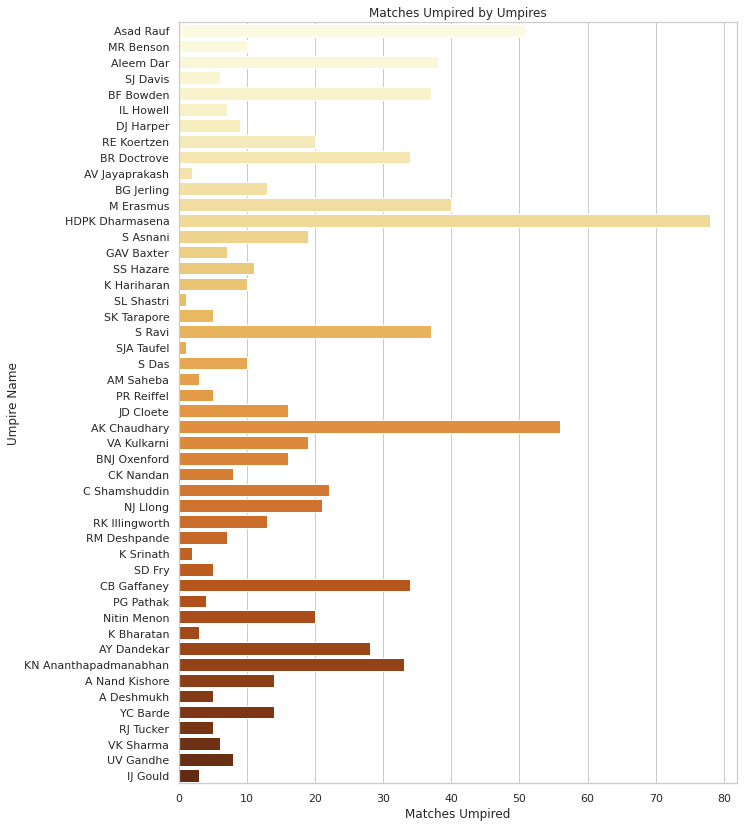

In [350]:
fig = plt.figure(figsize=(10,14))
sns.countplot(y='umpire1', data = df_matches, orient='v', palette = np.random.choice(fig_colors))
plt.title('Matches Umpired by Umpires')
plt.ylabel('Umpire Name')
plt.xlabel('Matches Umpired')
plt.show()
fig.savefig('Umpire_fig.jpg')

# Matches won by Team1 against Team2

In [351]:
df_matches['team1'].unique().tolist()

['Royal Challengers Bangalore',
 'Kings XI Punjab',
 'Delhi Daredevils',
 'Mumbai Indians',
 'Kolkata Knight Riders',
 'Rajasthan Royals',
 'Deccan Chargers',
 'Chennai Super Kings',
 'Kochi Tuskers Kerala',
 'Pune Warriors',
 'Sunrisers Hyderabad',
 'Gujarat Lions',
 'Rising Pune Supergiants',
 'Rising Pune Supergiant',
 'Delhi Capitals']

Total matches played =  27
Matches won by  Mumbai Indians =  17
Win Percentages =  62.96 %


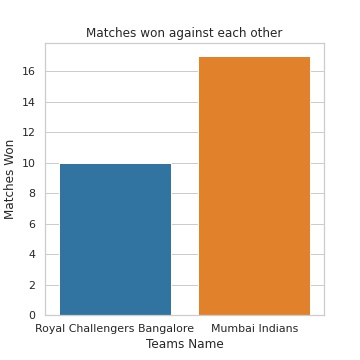

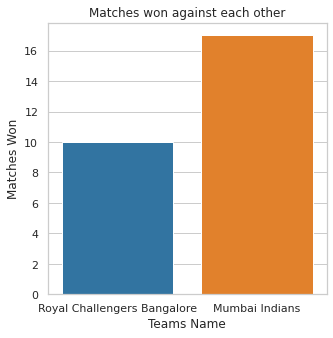

In [352]:
#matches_won_by_team1_team2
from google.colab.patches import cv2_imshow
def matches_won_by_team1_team2(team1, team2):
  temp1 = df_matches[ (df_matches['team1'] == team1) & (df_matches['team2']==team2)]
  temp2 = df_matches[ (df_matches['team1'] == team2) & (df_matches['team2']==team1)]

  total_matches = temp1.shape[0] + temp2.shape[0]

  #Matches won by the teams
  matches_won_by_team1 = temp1[temp1['winner'] == team1].shape[0] + temp2[temp2['winner'] == team1].shape[0]

  print('Total matches played = ', total_matches)
  print('Matches won by ', team1 ,'= ',matches_won_by_team1)
  print('Win Percentages = ', round((matches_won_by_team1*100)/total_matches, 2), '%')

  new_df = pd.concat([temp1,temp2], ignore_index = True)

  #plotting
  fig = plt.figure(figsize=(5,5))
  sns.countplot(x = 'winner', data = new_df,dodge= False, palette = np.random.choice(fig_colors))
  plt.title('Matches won against each other')
  plt.xlabel('Teams Name')
  plt.ylabel('Matches Won')
  plt.savefig('fig1.jpg')
  cv2_imshow(cv2.imread('fig1.jpg'))

matches_won_by_team1_team2('Mumbai Indians', 'Royal Challengers Bangalore')

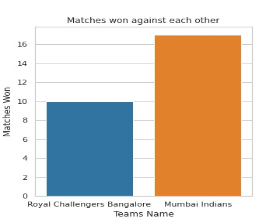

In [353]:
import cv2
from google.colab.patches import cv2_imshow

img = (cv2.imread('fig1.jpg'))
img = cv2.resize(img, (280,224))
cv2_imshow(img)

In [354]:
df_matches.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')

# Matches Won by Chasing

496
273
223
Percentage of matches won by chasing : 55.04 %


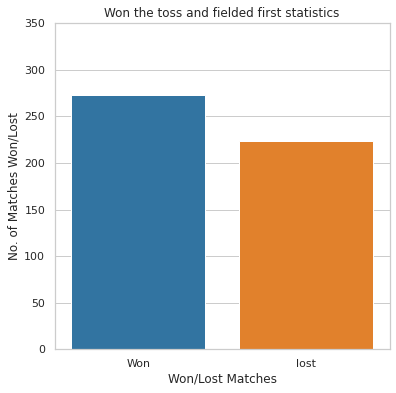

In [355]:
temp3 = df_matches[df_matches['toss_decision'] == 'field']
tot_matches_played_chasing = temp3.shape[0]
print(tot_matches_played_chasing)
temp3 = temp3[temp3['toss_winner'] == temp3['winner']]
won_by_chasing = temp3.shape[0]
print(won_by_chasing)
lost_by_chasing = tot_matches_played_chasing - won_by_chasing
print(lost_by_chasing)
print('Percentage of matches won by chasing :',round((won_by_chasing*100)/tot_matches_played_chasing,2), '%')


fig = plt.figure(figsize= (6,6))
sns.barplot(x = ['Won', 'lost'], y = [won_by_chasing, lost_by_chasing] , palette = np.random.choice(fig_colors))
plt.xlabel('Won/Lost Matches')
plt.ylabel('No. of Matches Won/Lost')
plt.title('Won the toss and fielded first statistics')
plt.ylim(0,350)
plt.savefig('won_by_chasing.jpg')

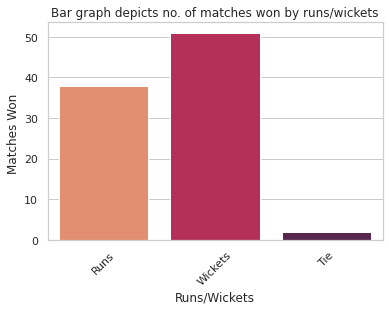

In [356]:
#Each team statistics for runs/wickets

def matches_won_by_runs_wickets(team_name):
  temp5 = df_matches[df_matches['team1'] == team_name]
  temp5 = temp5[temp5['winner'] == temp5['team1']]
  temp6 = df_matches[df_matches['team2'] == team_name]
  temp6 = temp6[temp6['winner'] == temp6['team2']]

  temp7 = pd.concat([temp5, temp6],ignore_index = True)
  sns.countplot(x ='result', data = temp7, dodge=False, palette = np.random.choice(fig_colors))
  plt.title('Bar graph depicts no. of matches won by runs/wickets')
  plt.xlabel('Runs/Wickets')
  plt.ylabel('Matches Won ')
  plt.xticks([0,1,2],['Runs', 'Wickets', 'Tie'], rotation = 45)
  plt.show()

matches_won_by_runs_wickets('Royal Challengers Bangalore')

[]

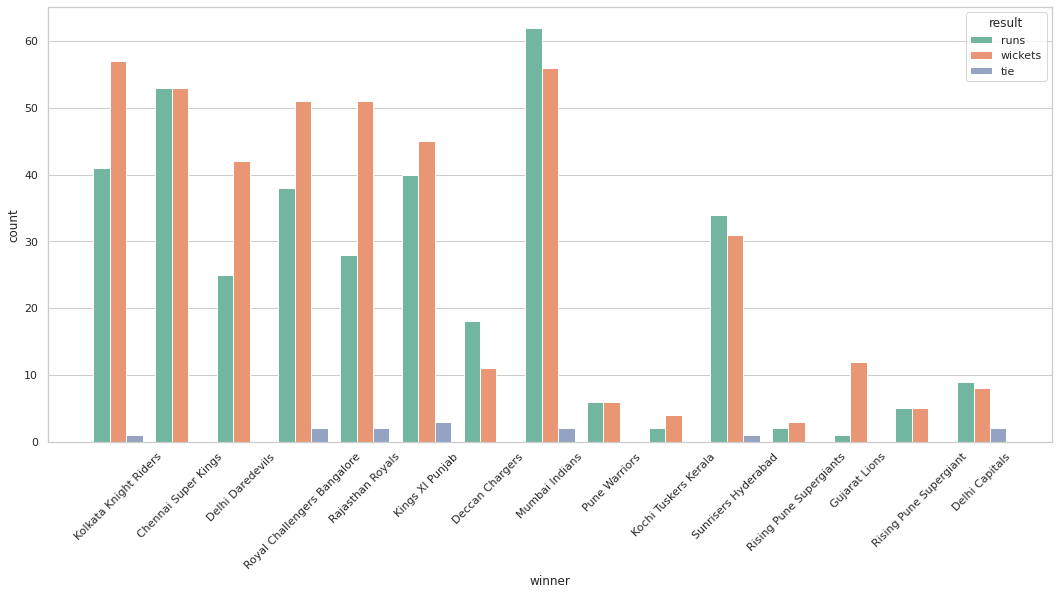

In [357]:
fig = plt.figure(figsize = (18,8))
sns.countplot(x='winner', hue='result', data = df_matches, palette=np.random.choice(fig_colors))
plt.xticks(rotation = 45)
plt.plot()

In [358]:
%%writefile IPL_EDA_DashBoard.py
import streamlit as st
st.title('IPL Data Analysis Tool')
choices = st.sidebar.radio('*Navigation*', ['Home', 'Matches Statistics', 'Player Statistics'])
if choices == 'Home':
  st.write('Home Page')
elif choices == 'Matches Statistics':
  st.write('Matches page')
elif choices== 'Player Statistics' :
  st.write('Players')


Overwriting IPL_EDA_DashBoard.py


# Loading ball by ball players data

In [359]:
df_ball = pd.read_csv('/content/drive/My Drive/DataSet/IPL Ball-by-Ball 2008-2020.csv')

In [360]:
df_ball.columns

Index(['id', 'inning', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'batsman_runs', 'extra_runs', 'total_runs', 'non_boundary', 'is_wicket',
       'dismissal_kind', 'player_dismissed', 'fielder', 'extras_type',
       'batting_team', 'bowling_team'],
      dtype='object')

In [361]:
df_ball.head(5)

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [362]:
df_ball.info(memory_usage = 'Deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting_team      193468 non-null  obj

In [363]:
df = df_ball
df2 = df_matches.loc[:,['id', 'date']]
df2

,id,date
0,335982,2008
1,335983,2008
2,335984,2008
3,335985,2008
4,335986,2008
...,...,...
811,1216547,2020
812,1237177,2020
813,1237178,2020
814,1237180,2020


In [364]:
# df = df_ball
# df2 = df_matches.loc[:,['id', 'date']]
# df = pd.merge(df,df2,on = 'id')
# df['date'] = pd.to_numeric(df['date'], downcast = 'integer')
# df_ball = df

In [365]:
df = pd.merge(df,df2,on = 'id')
df

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,date
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,2008
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,2008
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,2008
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,2008
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193463,1237181,1,12,5,RR Pant,SS Iyer,NM Coulter-Nile,0,0,0,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians,2020
193464,1237181,1,12,6,RR Pant,SS Iyer,NM Coulter-Nile,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians,2020
193465,1237181,1,13,1,RR Pant,SS Iyer,KH Pandya,0,1,1,0,0,NaN,NaN,NaN,wides,Delhi Capitals,Mumbai Indians,2020
193466,1237181,1,13,2,RR Pant,SS Iyer,KH Pandya,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians,2020


In [366]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193468 entries, 0 to 193467
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting_team      193468 non-null  obj

In [367]:
df['date'] = pd.to_numeric(df['date'], downcast = 'integer')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193468 entries, 0 to 193467
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting_team      193468 non-null  obj

In [368]:
df_ball = df

In [369]:
#droping irrelevant columns
df_ball.drop(columns = ['inning','over', 'ball' , 'extra_runs', 'dismissal_kind', 'player_dismissed', 'fielder', 'extras_type'], inplace = True)
df_ball.columns

Index(['id', 'batsman', 'non_striker', 'bowler', 'batsman_runs', 'total_runs',
       'non_boundary', 'is_wicket', 'batting_team', 'bowling_team', 'date'],
      dtype='object')

# year wise runs scored by batsman Graph

date
2008    419
2009    379
2010    422
2011    382
2012    448
2013    548
2014    397
2015    492
2016    498
2017    349
2018    297
2019    410
2020    353
Name: total_runs, dtype: int64


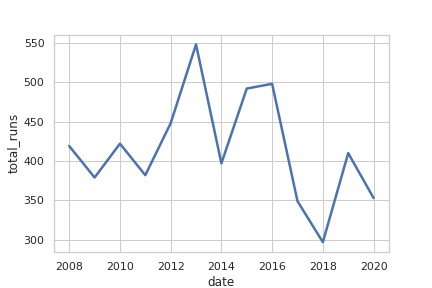

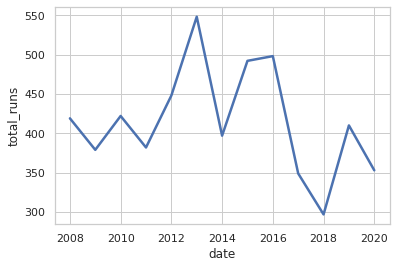

In [370]:
temp8 = df_ball[df_ball['batsman'] == 'RG Sharma']
temp8 = temp8.groupby(by = 'date')['total_runs'].sum()
print(temp8)
fig = plt.figure()
sns.set_theme(style="whitegrid")
sns.lineplot(x= temp8.index, y = temp8, linewidth = '2.5', palette='tab8', markers=True)
#sns.scatterplot(x=temp8.index, y = temp8,palette='pastel')
plt.savefig('fig2.jpg')
img = cv2.imread('fig2.jpg')
cv2_imshow(img)

In [371]:
#ball played and total runs score
temp8 = df_ball[df_ball['batsman'] == 'MS Dhoni']
balls_faced = temp8.shape[0]
total_runs = temp8['batsman_runs'].sum()
total_runs

4632

In [372]:
#total matches

matches_played =  temp8['id'].nunique()
matches_played

182

In [373]:
four_six = temp8['batsman_runs'].value_counts()
four_six

1    1409
0    1225
2     315
4     313
6     216
3      15
Name: batsman_runs, dtype: int64

In [374]:
dotted_balls_percentage = round((four_six[0]/balls_faced)*100,2)
dotted_balls_percentage


35.07

In [375]:
strike_rate = round((total_runs/balls_faced)*100,2)
strike_rate

132.61

In [376]:
average_score = round((total_runs/matches_played), 2)
average_score

25.45

In [377]:
def players_stats(player_name):
  temp8 = df_ball[df_ball['batsman'] == player_name]
  balls_faced = temp8.shape[0]
  total_runs = temp8['batsman_runs'].sum()
  
  matches_played =  temp8['id'].nunique()
  four_six = temp8['batsman_runs'].value_counts()
  sixs = 0
  fours = 0
  runs_index = four_six.index.tolist()
  if 4 in runs_index:
    fours = four_six[4]
  if 6 in runs_index:
    sixs = four_six[6]
  
  dotted_balls = 0
  if 0 in runs_index:
    dotted_balls = four_six[0]
  dotted_balls_percentage = round((dotted_balls/balls_faced)*100,2)
  strike_rate = round((total_runs/balls_faced)*100,2)
  average_score = round((total_runs/matches_played), 2)

  return [player_name,matches_played, total_runs, balls_faced,strike_rate, average_score,dotted_balls_percentage,fours, sixs]

players_stats('B Stanlake')


['B Stanlake', 1, 5, 2, 250.0, 5.0, 0.0, 1, 0]

In [378]:
temp8 = df_ball[df_ball['batsman'] == 'B Stanlake']
temp8

,id,batsman,non_striker,bowler,batsman_runs,total_runs,non_boundary,is_wicket,batting_team,bowling_team,date
151961,1136567,B Stanlake,DJ Hooda,BCJ Cutting,1,1,0,0,Sunrisers Hyderabad,Mumbai Indians,2018
151963,1136567,B Stanlake,DJ Hooda,BCJ Cutting,4,4,0,0,Sunrisers Hyderabad,Mumbai Indians,2018


In [379]:
temp9 = df_ball.groupby('batsman')['batsman_runs'].sum()
(temp9)

batsman
A Ashish Reddy     280
A Chandila           4
A Chopra            53
A Choudhary         25
A Dananjaya          4
                  ... 
YV Takawale        192
Yashpal Singh       47
Younis Khan          3
Yuvraj Singh      2750
Z Khan             117
Name: batsman_runs, Length: 537, dtype: int64

In [380]:
temp9.sort_values(ascending = False)

batsman
V Kohli           5878
SK Raina          5368
DA Warner         5254
RG Sharma         5230
S Dhawan          5197
                  ... 
IC Pandey            0
S Kaushik            0
ND Doshi             0
V Pratap Singh       0
Abdur Razzak         0
Name: batsman_runs, Length: 537, dtype: int64

In [381]:
top_5_batsmans = ['V Kohli','SK Raina', 'DA Warner', 'RG Sharma', 'S Dhawan']

In [382]:
player_name_list = temp9.index.tolist()
player_name_list[:20]

['A Ashish Reddy',
 'A Chandila',
 'A Chopra',
 'A Choudhary',
 'A Dananjaya',
 'A Flintoff',
 'A Kumble',
 'A Mishra',
 'A Mithun',
 'A Mukund',
 'A Nehra',
 'A Nortje',
 'A Singh',
 'A Symonds',
 'A Uniyal',
 'A Zampa',
 'AA Bilakhia',
 'AA Chavan',
 'AA Jhunjhunwala',
 'AA Noffke']

In [383]:
players_data_2d_list = []

for name in player_name_list:
  #print(name)
  ret_data = players_stats(name)
  players_data_2d_list.append(ret_data)


In [384]:
#creating dataframe for players statistics
columns_names = ['name','matches_played', 'total_runs', 'balls_faced' ,'strike_rate', 'average_score','dotted_balls_percentage','fours', 'sixs']
import pandas as pd

players_stats_df = pd.DataFrame(data = players_data_2d_list, columns=columns_names)

players_stats_df


#pickle.dump(players_stats_df, open('./players_stats_df.pkl', 'wb'))


,name,matches_played,total_runs,balls_faced,strike_rate,average_score,dotted_balls_percentage,fours,sixs
0,A Ashish Reddy,23,280,196,142.86,12.17,31.12,16,15
1,A Chandila,2,4,7,57.14,2.00,42.86,0,0
2,A Chopra,6,53,75,70.67,8.83,60.00,7,0
3,A Choudhary,3,25,20,125.00,8.33,20.00,1,1
4,A Dananjaya,1,4,5,80.00,4.00,40.00,0,0
...,...,...,...,...,...,...,...,...,...
532,YV Takawale,10,192,183,104.92,19.20,54.64,26,3
533,Yashpal Singh,4,47,67,70.15,11.75,58.21,5,0
534,Younis Khan,1,3,7,42.86,3.00,57.14,0,0
535,Yuvraj Singh,126,2750,2205,124.72,21.83,44.26,217,149


In [385]:
#player_stats_df = pickle.load(open("players_stats_df.pkl", "rb"))
players_stats_df

,name,matches_played,total_runs,balls_faced,strike_rate,average_score,dotted_balls_percentage,fours,sixs
0,A Ashish Reddy,23,280,196,142.86,12.17,31.12,16,15
1,A Chandila,2,4,7,57.14,2.00,42.86,0,0
2,A Chopra,6,53,75,70.67,8.83,60.00,7,0
3,A Choudhary,3,25,20,125.00,8.33,20.00,1,1
4,A Dananjaya,1,4,5,80.00,4.00,40.00,0,0
...,...,...,...,...,...,...,...,...,...
532,YV Takawale,10,192,183,104.92,19.20,54.64,26,3
533,Yashpal Singh,4,47,67,70.15,11.75,58.21,5,0
534,Younis Khan,1,3,7,42.86,3.00,57.14,0,0
535,Yuvraj Singh,126,2750,2205,124.72,21.83,44.26,217,149


# Cosine Similarity based Players Recommendation system


In [386]:
import sklearn
from sklearn.metrics.pairwise import cosine_similarity
data = players_stats_df.drop(columns =['name'])
similarity = cosine_similarity(data)
print(similarity.shape)


(537, 537)


In [387]:
#pickle.dump(similarity, open('similarity.pkl', 'wb'))

In [388]:
similarity_list = similarity[505].tolist()

similarity_indexes = []

for i in range(6):
  ind = similarity_list.index(max(similarity_list))
  print(similarity_list[ind])
  similarity_indexes.append(ind)
  similarity_list[ind] = -0.99
  i = i+1

similarity_indexes

1.0000000000000002
0.999971049551101
0.9999036851515155
0.9998207036457827
0.9997864700031147
0.9997789199560533


[505, 379, 398, 225, 55, 438]

In [389]:
#first player is the same, rest 5 players is recommended or similar to this player
t = players_stats_df.iloc[similarity_indexes ]
t

,name,matches_played,total_runs,balls_faced,strike_rate,average_score,dotted_balls_percentage,fours,sixs
505,V Kohli,184,5878,4609,127.53,31.95,35.26,504,202
379,RG Sharma,194,5230,4088,127.94,26.96,37.48,458,214
398,RV Uthappa,182,4607,3658,125.94,25.31,40.46,454,163
225,KD Karthik,176,3823,3023,126.46,21.72,36.29,377,105
55,AT Rayudu,149,3659,2970,123.20,24.56,35.99,308,132
438,SK Raina,189,5368,4041,132.84,28.40,34.94,493,194


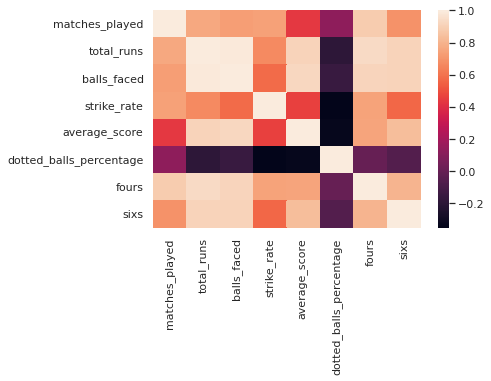

In [390]:
sns.heatmap(t.corr())
plt.show()

In [391]:
name_list = players_stats_df.iloc[similarity_indexes ]['name'].tolist()

temp8 = df_ball[df_ball['batsman'] == name_list[0]]
temp8 = temp8.groupby(by = 'date')['total_runs'].sum()
temp8


date
2008    187
2009    258
2010    320
2011    584
2012    375
2013    655
2014    373
2015    519
2016    998
2017    314
2018    539
2019    472
2020    487
Name: total_runs, dtype: int64

In [392]:
df_5 = pd.DataFrame({ 'runs':temp8})
df_5.reset_index(inplace = True)
df_5['name'] = name_list[0]
df_5

,date,runs,name
0,2008,187,V Kohli
1,2009,258,V Kohli
2,2010,320,V Kohli
3,2011,584,V Kohli
4,2012,375,V Kohli
5,2013,655,V Kohli
6,2014,373,V Kohli
7,2015,519,V Kohli
8,2016,998,V Kohli
9,2017,314,V Kohli


In [393]:
temp8 = df_ball[df_ball['batsman'] == name_list[0]]
temp8 = temp8.groupby(by = 'date')['total_runs'].sum()

name_list = players_stats_df.iloc[similarity_indexes ]['name'].tolist()
df_5 = pd.DataFrame({ 'runs':temp8})
df_5.reset_index(inplace = True)
df_5['name'] = name_list[0]
df_5

for i in range(1,6):
  temp8 = df_ball[df_ball['batsman'] == name_list[i]]
  temp8 = temp8.groupby(by = 'date')['total_runs'].sum()
  df_4 = pd.DataFrame({ 'runs':temp8})
  df_4.reset_index(inplace = True)
  df_4['name'] = name_list[i]
  df_5 = pd.concat((df_5, df_4))
  

df_5.reset_index(drop = True, inplace =True)

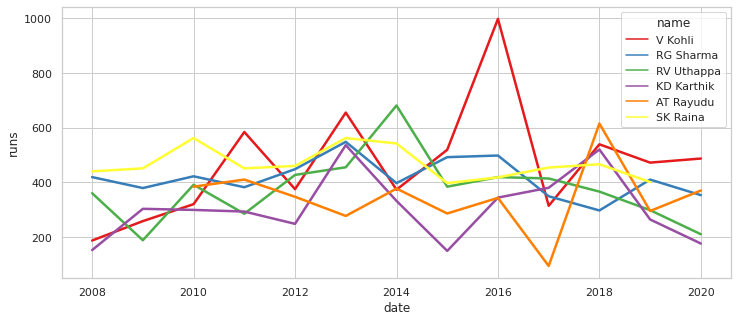

In [394]:
sns.set_theme(style="whitegrid")
fig_colors = ['Set1', 'Set2', 'Set3', 'tab10' ,'deep', 'hls', 'husl', 'rocket_r', 'YlOrBr', 'Spectral']
fig = plt.figure(figsize=(12,5))

sns.lineplot(x= 'date', y = 'runs',data=df_5, hue='name',markers=True,  linewidth = '2.5', palette = np.random.choice(fig_colors))
plt.show()

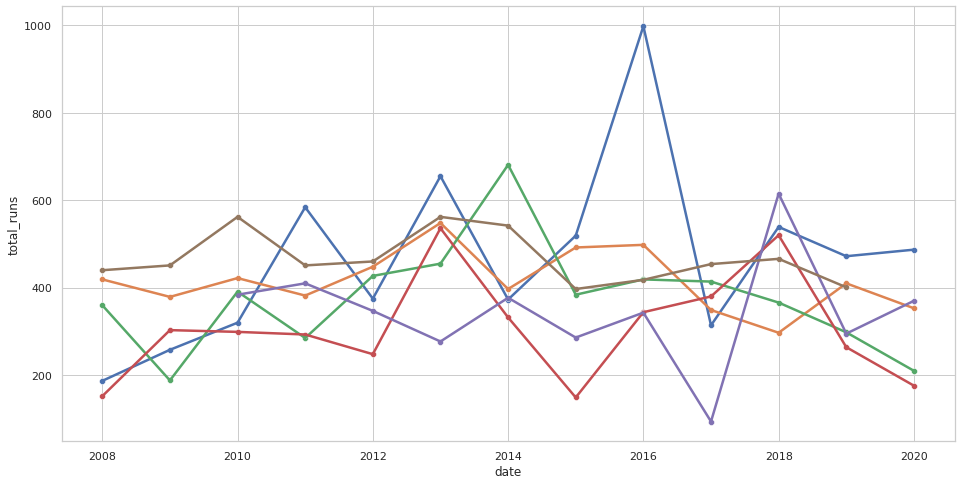

In [395]:
name_list = players_stats_df.iloc[similarity_indexes ]['name'].tolist()
fig = plt.figure(figsize=(16,8))
fig_colors = ['Set1', 'Set2', 'Set3', 'tab10' ,'deep', 'hls', 'husl', 'rocket_r', 'YlOrBr', 'Spectral']
for name in name_list:    
  temp8 = df_ball[df_ball['batsman'] == name]
  temp8 = temp8.groupby(by = 'date')['total_runs'].sum()
  sns.set_theme(style="whitegrid")
  sns.lineplot(x= temp8.index, y = temp8, linewidth = '2.5')
  sns.scatterplot(x=temp8.index, y = temp8)

plt.show()

In [396]:
#top 5 scorere
temp10 = players_stats_df.sort_values(by= ['total_runs'], ascending = False)[0:5]
temp10

,name,matches_played,total_runs,balls_faced,strike_rate,average_score,dotted_balls_percentage,fours,sixs
505,V Kohli,184,5878,4609,127.53,31.95,35.26,504,202
438,SK Raina,189,5368,4041,132.84,28.40,34.94,493,194
116,DA Warner,142,5254,3819,137.58,37.00,37.42,510,195
379,RG Sharma,194,5230,4088,127.94,26.96,37.48,458,214
407,S Dhawan,175,5197,4208,123.50,29.70,38.33,591,109


In [397]:
#top5 strike rate
temp11 = players_stats_df[players_stats_df['matches_played'] > 150 ]
temp11 = temp11.sort_values(by= ['strike_rate'], ascending = False)[0:5]
temp11

,name,matches_played,total_runs,balls_faced,strike_rate,average_score,dotted_balls_percentage,fours,sixs
24,AB de Villiers,156,4849,3264,148.56,31.08,31.89,390,235
530,YK Pathan,153,3204,2330,137.51,20.94,37.42,262,159
438,SK Raina,189,5368,4041,132.84,28.40,34.94,493,194
301,MS Dhoni,182,4632,3493,132.61,25.45,35.07,313,216
379,RG Sharma,194,5230,4088,127.94,26.96,37.48,458,214


In [398]:
#top 5 average score
temp12 = players_stats_df.sort_values(by= ['average_score'], ascending = False)[0:5]
temp12.loc[:, ['name', 'average_score']]

,name,average_score
206,JM Bairstow,37.62
254,LMP Simmons,37.21
116,DA Warner,37.00
232,KL Rahul,36.76
96,CH Gayle,36.43


In [399]:
# top5 players with sixs
temp13 = players_stats_df.sort_values(by= ['sixs'], ascending = False)[0:5]
temp13.loc[:, ['name', 'sixs']]

,name,sixs
96,CH Gayle,349
24,AB de Villiers,235
301,MS Dhoni,216
379,RG Sharma,214
505,V Kohli,202


In [400]:
#top 5 players with fours
temp14 = players_stats_df.sort_values(by= ['fours'], ascending = False)[0:5]
temp14.loc[:, ['name', 'fours']]

,name,fours
407,S Dhawan,591
116,DA Warner,510
505,V Kohli,504
438,SK Raina,493
154,G Gambhir,492


In [401]:
#check for a player

def check_player_stats(player_name):
  temp13 = players_stats_df[players_stats_df['name'] == player_name]
  print(temp13)

check_player_stats('SK Raina')

         name  matches_played  total_runs  balls_faced  strike_rate  \
438  SK Raina             189        5368         4041       132.84   

     average_score  dotted_balls_percentage  fours  sixs  
438           28.4                    34.94    493   194  


In [402]:
#bowler name lists
bowler_name_list = df_ball['bowler'].unique().tolist()
#bowler_name_list

In [403]:
temp15 = df_ball[ df_ball['bowler'] == 'PJ Cummins' ]
temp15 =  temp15[temp15['batsman'] == 'SK Raina' ]
temp15

,id,batsman,non_striker,bowler,batsman_runs,total_runs,non_boundary,is_wicket,batting_team,bowling_team,date
105579,734023,SK Raina,BB McCullum,PJ Cummins,0,0,0,0,Chennai Super Kings,Kolkata Knight Riders,2014
105580,734023,SK Raina,BB McCullum,PJ Cummins,0,0,0,0,Chennai Super Kings,Kolkata Knight Riders,2014
105581,734023,SK Raina,BB McCullum,PJ Cummins,0,0,0,0,Chennai Super Kings,Kolkata Knight Riders,2014
105582,734023,SK Raina,BB McCullum,PJ Cummins,0,0,0,0,Chennai Super Kings,Kolkata Knight Riders,2014
105646,734023,SK Raina,F du Plessis,PJ Cummins,0,0,0,0,Chennai Super Kings,Kolkata Knight Riders,2014
105647,734023,SK Raina,F du Plessis,PJ Cummins,1,1,0,0,Chennai Super Kings,Kolkata Knight Riders,2014
105670,734023,SK Raina,F du Plessis,PJ Cummins,1,1,0,0,Chennai Super Kings,Kolkata Knight Riders,2014
105672,734023,SK Raina,MS Dhoni,PJ Cummins,0,0,0,0,Chennai Super Kings,Kolkata Knight Riders,2014
105673,734023,SK Raina,MS Dhoni,PJ Cummins,1,1,0,0,Chennai Super Kings,Kolkata Knight Riders,2014
111075,829723,SK Raina,BB McCullum,PJ Cummins,0,1,0,0,Chennai Super Kings,Kolkata Knight Riders,2015


In [404]:
#total runs against bowler
temp15['total_runs'].sum()

20

In [405]:
# bowler took wickets for the batsman
temp15['is_wicket'].sum()

1

In [406]:
#total matches played aginst the bowler
temp15['id'].nunique()

4

In [407]:
#total balls faced 
temp15.shape[0]

19

In [408]:
#per over avrage score, calculation method = runs per ball * 6
round((temp15['total_runs'].sum()/temp15.shape[0])*6,2)

6.32

In [409]:
def batsman_against_bowler(batsman_name, bowler_name):
  temp15 = df_ball[ df_ball['bowler'] == bowler_name ]
  temp15 =  temp15[temp15['batsman'] == batsman_name ]
  total_balls_faced = temp15.shape[0]
  if total_balls_faced == 0:
    return []

  four_six = temp15['batsman_runs'].value_counts()
  sixs = 0
  fours = 0
  runs_index = four_six.index.tolist()
  if 4 in runs_index:
    fours = four_six[4]
  if 6 in runs_index:
    sixs = four_six[6]
  total_runs = temp15['total_runs'].sum()
  is_wicket = temp15['is_wicket'].sum()
  total_matches_played = temp15['id'].nunique()
  total_balls_faced = temp15.shape[0]
  avg_per_over = round((total_runs/total_balls_faced)*6,2)

  return [total_matches_played, total_runs,is_wicket, total_balls_faced,fours,sixs]


batsman_against_bowler('SK Raina', 'Mohammed Siraj')


[3, 16, 1, 12, 1, 1]

In [410]:
df_matches.sort_values(by = ['date'], ascending = False).head(5)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
815,1237181,Dubai,2020,TA Boult,Dubai International Cricket Stadium,0,Delhi Capitals,Mumbai Indians,Delhi Capitals,bat,Mumbai Indians,wickets,5.0,N,NaN,CB Gaffaney,Nitin Menon
785,1216521,Sharjah,2020,TA Boult,Sharjah Cricket Stadium,0,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,wickets,10.0,N,NaN,C Shamshuddin,VA Kulkarni
783,1216519,Dubai,2020,AR Patel,Dubai International Cricket Stadium,0,Delhi Capitals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Delhi Capitals,runs,59.0,N,NaN,Nitin Menon,YC Barde
782,1216518,Dubai,2020,MK Pandey,Dubai International Cricket Stadium,0,Rajasthan Royals,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,8.0,N,NaN,Nitin Menon,PR Reiffel
781,1216517,Dubai,2020,KL Rahul,Dubai International Cricket Stadium,0,Mumbai Indians,Kings XI Punjab,Mumbai Indians,bat,Kings XI Punjab,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel


# Dream 11 Team recommendation system

In [411]:
# teams players collection using atch id to fetch a team players based on 2020 IPL teams
temp16 = df_ball[ df_ball['id'] == 1216517 ]
team1 = temp16['batting_team'].unique()[0]
team2 = temp16['bowling_team'].unique()[0]
batsman_list = temp16 [temp16['batting_team'] == team1]['batsman'].unique().tolist()
bowler_list = temp16 [temp16['bowling_team'] == team1]['bowler'].unique().tolist()
(batsman_list + bowler_list)
for bowler in bowler_list:
  if bowler not in batsman_list:
    batsman_list.append(bowler)
batsman_list

['KH Pandya',
 'Q de Kock',
 'RG Sharma',
 'SA Yadav',
 'Ishan Kishan',
 'HH Pandya',
 'KA Pollard',
 'NM Coulter-Nile',
 'RD Chahar',
 'JJ Bumrah',
 'TA Boult']

# Teams with player names

In [412]:
MI = ['KH Pandya','Q de Kock','RG Sharma','SA Yadav','Ishan Kishan','HH Pandya','KA Pollard','NM Coulter-Nile','RD Chahar','JJ Bumrah','TA Boult']
SRH = ['DA Warner','JM Bairstow','MK Pandey','Abdul Samad','KS Williamson','PK Garg','Abhishek Sharma','Sandeep Sharma','KK Ahmed','T Natarajan','Rashid Khan']
CSK = ['F du Plessis','AT Rayudu','SM Curran','DL Chahar','RD Gaikwad','MS Dhoni','SN Thakur','Imran Tahir','N Jagadeesan','RA Jadeja','JR Hazlewood']
KXIPB = ['KL Rahul','CH Gayle','N Pooran','Mandeep Singh','DJ Hooda','JDS Neesham','CJ Jordan','MA Agarwal','Mohammed Shami','Ravi Bishnoi','M Ashwin']
KKR = ['EJG Morgan', 'AD Russell', 'PJ Cummins', 'RA Tripathi', 'KD Karthik', 'KL Nagarkoti', 'Shubman Gill', 'N Rana','SP Narine','Shivam Mavi','CV Varun']
RR = ['RV Uthappa','BA Stokes','SV Samson','JC Buttler','SPD Smith','R Tewatia', 'JC Archer', 'Kartik Tyagi', 'S Gopal','JD Unadkat']
DC = ['SS Iyer','RR Pant','SO Hetmyer', 'AR Patel', 'MP Stoinis', 'AM Rahane', 'S Dhawan','R Ashwin', 'K Rabada','A Nortje','P Dubey']
RCB = ['V Kohli','D Padikkal','AJ Finch', 'AB de Villiers', 'MM Ali', 'S Dube', 'Washington Sundar','NA Saini','Mohammed Siraj','A Zampa','YS Chahal']


In [413]:
#function to collect team1 stats against team2 bowlers

def team_batting_stats(team1,team2):
  player_stats_list = []

  for batsman in team1:
    batsman_stats = []
    for bowler in team2:
      #result is in the form of   return [total_matches_played, total_runs,is_wicket, total_balls_faced,fours,sixs]
      result = batsman_against_bowler(batsman, bowler)
      if len(result)>0:
        if len(batsman_stats)>0:
          batsman_stats = list(np.add(batsman_stats,result))
        else:
          batsman_stats = result

    #run_rate = round((total_runs/total_balls_faced)*6,2)
    if len(batsman_stats) > 0:
      run_rate =   round((batsman_stats[1]/batsman_stats[3])*6,2)
      strike_rate = round((batsman_stats[1]/batsman_stats[3])*100,2)

      player_stats_list.append([batsman] + batsman_stats + [ run_rate, strike_rate])

  return player_stats_list



In [414]:
def team_bowling_stats(team1,team2):
  player_stats_list = []

  for bowler in team1:
    bowler_stats = []
    for batsman in team2:
      result = batsman_against_bowler(batsman, bowler)
      #result format   return [total_matches_played, total_runs,is_wicket, total_balls_faced,fours,sixs]
      if len(result)>0:
        if len(bowler_stats)>0:
          bowler_statss = list(np.add(bowler_stats,result))
        else:
          bowler_stats = result

    if len(bowler_stats) > 0:
      economy =   round((bowler_stats[1]/bowler_stats[3])*6,2)
      player_stats_list.append([bowler] + bowler_stats + [ economy])

  return player_stats_list


In [415]:
team1_batting_stats = pd.DataFrame(data = team_batting_stats(MI, CSK), columns = ['Name', 'Matches', 'Runs','Out','Balls Played','fours','sixs' ,'Run Rate', 'Strike Rate'])
team2_batting_stats = pd.DataFrame(data = team_batting_stats(CSK, MI),columns = ['Name', 'Matches', 'Runs','Out','Balls Played' ,'fours','sixs','Run Rate', 'Strike Rate'] )
print(team1_batting_stats)
print(team2_batting_stats)

           Name  Matches  Runs  Out  Balls Played  fours  sixs  Run Rate  \
0     KH Pandya       13    74    4            48      6     3      9.25   
1     Q de Kock       18   141    4           109     10     8      7.76   
2     RG Sharma       39   240    6           199     18     7      7.24   
3      SA Yadav       25   166    4           144     23     1      6.92   
4  Ishan Kishan       18   122    5            82     12     6      8.93   
5     HH Pandya       18    61    3            46      3     4      7.96   
6    KA Pollard       21   215    4           109     11    20     11.83   
7     RD Chahar        2     1    1             4      0     0      1.50   
8     JJ Bumrah        2     7    0             5      0     0      8.40   
9      TA Boult        2     6    2             4      0     1      9.00   

   Strike Rate  
0       154.17  
1       129.36  
2       120.60  
3       115.28  
4       148.78  
5       132.61  
6       197.25  
7        25.00  
8       14

In [416]:
batsman_merge_df = pd.concat([team1_batting_stats, team2_batting_stats], ignore_index = True)
matches_average = round(batsman_merge_df['Matches'].describe()['mean'])
matches_average

15

In [417]:
batsman_merge_df = batsman_merge_df[batsman_merge_df['Matches']>= matches_average]
batsman_merge_df.sort_values(by='Run Rate', ascending = False)

,Name,Matches,Runs,Out,Balls Played,fours,sixs,Run Rate,Strike Rate
6,KA Pollard,21,215,4,109,11,20,11.83,197.25
4,Ishan Kishan,18,122,5,82,12,6,8.93,148.78
5,HH Pandya,18,61,3,46,3,4,7.96,132.61
15,MS Dhoni,51,323,13,247,23,16,7.85,130.77
1,Q de Kock,18,141,4,109,10,8,7.76,129.36
19,RA Jadeja,24,100,6,79,7,2,7.59,126.58
11,AT Rayudu,28,175,5,142,16,6,7.39,123.24
2,RG Sharma,39,240,6,199,18,7,7.24,120.60
10,F du Plessis,20,129,4,109,14,3,7.10,118.35
3,SA Yadav,25,166,4,144,23,1,6.92,115.28


In [418]:
#plaer slection formula .. calculate balls played per match average then convert to overs and then multiply by run rate add one more 
#colunm arrange them by this column
batsman_merge_df['predicted score per match'] = (batsman_merge_df['Balls Played']/batsman_merge_df['Matches'])*(batsman_merge_df['Run Rate']/6)

In [419]:
#dream 11 teams 6 batsman
batsman_merge_df.sort_values(by = 'predicted score per match', ascending = False)[0:6]

,Name,Matches,Runs,Out,Balls Played,fours,sixs,Run Rate,Strike Rate,predicted score per match
6,KA Pollard,21,215,4,109,11,20,11.83,197.25,10.233889
1,Q de Kock,18,141,4,109,10,8,7.76,129.36,7.831852
4,Ishan Kishan,18,122,5,82,12,6,8.93,148.78,6.780185
3,SA Yadav,25,166,4,144,23,1,6.92,115.28,6.643200
10,F du Plessis,20,129,4,109,14,3,7.10,118.35,6.449167
15,MS Dhoni,51,323,13,247,23,16,7.85,130.77,6.336438


# DREAM 11 RECOMMENDED BATSMAN

In [420]:
batsman_merge_df = pd.concat([team1_batting_stats, team2_batting_stats], ignore_index = True)
matches_average = round(batsman_merge_df['Matches'].describe()['mean'])
batsman_merge_df = batsman_merge_df[batsman_merge_df['Matches']>= matches_average]
#player selection formula .. calculate balls played per match average then convert to overs and then multiply by run rate add one more 
#colunm arrange them by this column
batsman_merge_df['predicted score per match'] = (batsman_merge_df['Balls Played']/batsman_merge_df['Matches'])*(batsman_merge_df['Run Rate']/6)
batsman_merge_df.sort_values(by = 'predicted score per match', ascending = False)[0:6]

,Name,Matches,Runs,Out,Balls Played,fours,sixs,Run Rate,Strike Rate,predicted score per match
6,KA Pollard,21,215,4,109,11,20,11.83,197.25,10.233889
1,Q de Kock,18,141,4,109,10,8,7.76,129.36,7.831852
4,Ishan Kishan,18,122,5,82,12,6,8.93,148.78,6.780185
3,SA Yadav,25,166,4,144,23,1,6.92,115.28,6.643200
10,F du Plessis,20,129,4,109,14,3,7.10,118.35,6.449167
15,MS Dhoni,51,323,13,247,23,16,7.85,130.77,6.336438


In [421]:
team1_bowling_stats = pd.DataFrame(data = team_bowling_stats(MI, CSK), columns = ['Name', 'Matches', 'Runs','wickets','Balls','fours','sixs' ,'Economy'])
team2_bowling_stats = pd.DataFrame(data = team_bowling_stats(CSK, MI),columns = ['Name', 'Matches', 'Runs','wickets','Balls' ,'fours','sixs','Economy' ])
print(team1_bowling_stats)
print(team2_bowling_stats)

              Name  Matches  Runs  wickets  Balls  fours  sixs  Economy
0        KH Pandya        3    30        1     21      3     1     8.57
1        RG Sharma        1     8        0      7      1     0     6.86
2        HH Pandya        1     2        0      2      0     0     6.00
3       KA Pollard        3     9        0     10      0     0     5.40
4  NM Coulter-Nile        3    17        0     12      3     0     8.50
5        RD Chahar        2    14        1     13      1     0     6.46
6        JJ Bumrah        5    39        0     27      4     2     8.67
7         TA Boult        6    35        2     36      6     0     5.83
           Name  Matches  Runs  wickets  Balls  fours  sixs  Economy
0     SM Curran        2     5        1      8      0     0     3.75
1     DL Chahar        8    84        2     61      8     5     8.26
2     SN Thakur        4     7        2      9      0     0     4.67
3   Imran Tahir        7    59        2     33      5     3    10.73
4     R

In [422]:
bowler_merge_df = pd.concat([team1_bowling_stats, team2_bowling_stats], ignore_index = True)
matches_average = round(bowler_merge_df['Matches'].describe()['mean'])
matches_average

3

In [423]:
bowler_merge_df = bowler_merge_df[bowler_merge_df['Matches']>= matches_average]
bowler_merge_df

,Name,Matches,Runs,wickets,Balls,fours,sixs,Economy
0,KH Pandya,3,30,1,21,3,1,8.57
3,KA Pollard,3,9,0,10,0,0,5.40
4,NM Coulter-Nile,3,17,0,12,3,0,8.50
6,JJ Bumrah,5,39,0,27,4,2,8.67
7,TA Boult,6,35,2,36,6,0,5.83
9,DL Chahar,8,84,2,61,8,5,8.26
10,SN Thakur,4,7,2,9,0,0,4.67
11,Imran Tahir,7,59,2,33,5,3,10.73


In [424]:
bowler_merge_df['Runs bowler can give per match'] = (bowler_merge_df['Balls']/bowler_merge_df['Matches'])*(bowler_merge_df['Economy']/6)

In [425]:
bowler_merge_df['wickets per match'] = bowler_merge_df['wickets']/bowler_merge_df['Matches']

In [426]:
#dream 11 teams 5 bowler
#first sort with Runs bowler can give per match the wickets per match

bowler_merge_df.sort_values(by = ['Runs bowler can give per match']).sort_values(by = 'wickets per match', ascending = False)[0:5]

,Name,Matches,Runs,wickets,Balls,fours,sixs,Economy,Runs bowler can give per match,wickets per match
10,SN Thakur,4,7,2,9,0,0,4.67,1.751250,0.500000
7,TA Boult,6,35,2,36,6,0,5.83,5.830000,0.333333
0,KH Pandya,3,30,1,21,3,1,8.57,9.998333,0.333333
11,Imran Tahir,7,59,2,33,5,3,10.73,8.430714,0.285714
9,DL Chahar,8,84,2,61,8,5,8.26,10.497083,0.250000


# DREAM 11 RECOMMENDED BOWLER

In [427]:
bowler_merge_df = pd.concat([team1_bowling_stats, team2_bowling_stats], ignore_index = True)
matches_average = round(bowler_merge_df['Matches'].describe()['mean'])
bowler_merge_df = bowler_merge_df[bowler_merge_df['Matches']>= matches_average]
bowler_merge_df['Runs bowler can give per match'] = (bowler_merge_df['Balls']/bowler_merge_df['Matches'])*(bowler_merge_df['Economy']/6)
bowler_merge_df['wickets per match'] = bowler_merge_df['wickets']/bowler_merge_df['Matches']
#dream 11 teams 5 bowler
#first sort with Runs bowler can give per match the wickets per match

bowler_merge_df.sort_values(by = ['Runs bowler can give per match']).sort_values(by = 'wickets per match', ascending = False)[0:5]

,Name,Matches,Runs,wickets,Balls,fours,sixs,Economy,Runs bowler can give per match,wickets per match
10,SN Thakur,4,7,2,9,0,0,4.67,1.751250,0.500000
7,TA Boult,6,35,2,36,6,0,5.83,5.830000,0.333333
0,KH Pandya,3,30,1,21,3,1,8.57,9.998333,0.333333
11,Imran Tahir,7,59,2,33,5,3,10.73,8.430714,0.285714
9,DL Chahar,8,84,2,61,8,5,8.26,10.497083,0.250000


# Streamlit Web App Code


In [428]:

import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import streamlit as st

fig_colors = ['Set1', 'Set2', 'Set3', 'tab10' ,'deep', 'hls', 'husl', 'rocket_r', 'YlOrBr', 'Spectral']

df_matches = pd.read_csv('IPL Matches 2008-2020.csv')
df = df_matches
date_list = df['date'].tolist()
for i in range(len(date_list)):
  date_list[i] = date_list[i][0:4]
df['date'] = date_list
df_matches = df

df_ball = pd.read_csv('./IPL Ball-by-Ball 2008-2020.csv')

#batsman stats aganst a particular bowler

def batsman_against_bowler(batsman_name, bowler_name):
  temp15 = df_ball[ df_ball['bowler'] == bowler_name ]
  temp15 =  temp15[temp15['batsman'] == batsman_name ]
  total_balls_faced = temp15.shape[0]
  if total_balls_faced == 0:
    return []

  four_six = temp15['batsman_runs'].value_counts()
  sixs = 0
  fours = 0
  runs_index = four_six.index.tolist()
  if 4 in runs_index:
    fours = four_six[4]
  if 6 in runs_index:
    sixs = four_six[6]
  total_runs = temp15['total_runs'].sum()
  is_wicket = temp15['is_wicket'].sum()
  total_matches_played = temp15['id'].nunique()
  total_balls_faced = temp15.shape[0]
  avg_per_over = round((total_runs/total_balls_faced)*6,2)

  return [total_matches_played, total_runs,is_wicket, total_balls_faced,fours,sixs]


#function to collect team1 batting stats against team2 bowlers
def team_batting_stats(team1,team2):
  player_stats_list = []

  for batsman in team1:
    batsman_stats = []
    for bowler in team2:
      #result is in the form of   return [total_matches_played, total_runs,is_wicket, total_balls_faced,fours,sixs]
      result = batsman_against_bowler(batsman, bowler)
      if len(result)>0:
        if len(batsman_stats)>0:
          batsman_stats = list(np.add(batsman_stats,result))
        else:
          batsman_stats = result

    #run_rate = round((total_runs/total_balls_faced)*6,2)
    if len(batsman_stats) > 0:
      run_rate =   round((batsman_stats[1]/batsman_stats[3])*6,2)
      strike_rate = round((batsman_stats[1]/batsman_stats[3])*100,2)

      player_stats_list.append([batsman] + batsman_stats + [ run_rate, strike_rate])

  return player_stats_list


#function to collect bowlers stats against team 2
def team_bowling_stats(team1,team2):
  player_stats_list = []

  for bowler in team1:
    bowler_stats = []
    for batsman in team2:
      result = batsman_against_bowler(batsman, bowler)
      #result format   return [total_matches_played, total_runs,is_wicket, total_balls_faced,fours,sixs]
      if len(result)>0:
        if len(bowler_stats)>0:
          bowler_statss = list(np.add(bowler_stats,result))
        else:
          bowler_stats = result

    if len(bowler_stats) > 0:
      economy =   round((bowler_stats[1]/bowler_stats[3])*6,2)
      player_stats_list.append([bowler] + bowler_stats + [ economy])

  return player_stats_list



#matches_won_by_team1_team2

def matches_won_by_team1_team2(team1, team2):
  temp1 = df_matches[ (df_matches['team1'] == team1) & (df_matches['team2']==team2)]
  temp2 = df_matches[ (df_matches['team1'] == team2) & (df_matches['team2']==team1)]

  total_matches = temp1.shape[0] + temp2.shape[0]

  #Matches won by the teams
  matches_won_by_team1 = temp1[temp1['winner'] == team1].shape[0] + temp2[temp2['winner'] == team1].shape[0]

  st.write('Total matches played = ', total_matches)
  st.write('Matches won by ', team1 ,'= ',matches_won_by_team1)
  st.write('Win Percentages = ', round((matches_won_by_team1*100)/total_matches, 2), '%')

  new_df = pd.concat([temp1,temp2], ignore_index = True)

  #plotting
  fig = plt.figure(figsize=(5,5))
  sns.countplot(x = 'winner', data = new_df,dodge= False, palette = np.random.choice(fig_colors))
  plt.title('Matches won against each other')
  plt.xlabel('Teams Name')
  plt.ylabel('Matches Won')
  plt.savefig('./fig1.jpg')
  img = cv2.imread('./fig1.jpg')
  img = cv2.resize(img, (880,824))
  _,col,_ = st.columns([1,4,1])
  with col:
    st.image(img)
  

#MATCHES WON BY RUNS/WICKETS
def matches_won_by_runs_wickets(team_name):
  temp5 = df_matches[df_matches['team1'] == team_name]
  temp5 = temp5[temp5['winner'] == temp5['team1']]
  temp6 = df_matches[df_matches['team2'] == team_name]
  temp6 = temp6[temp6['winner'] == temp6['team2']]

  temp7 = pd.concat([temp5, temp6],ignore_index = True)
  
  sns.countplot(x ='result', data = temp7, dodge=False, palette = np.random.choice(fig_colors)) 
  plt.title('Bar graph depicts no. of matches won by runs/wickets')
  plt.xlabel('Runs/Wickets')
  plt.ylabel('Matches Won ')
  plt.xticks([0,1,2],['Runs', 'Wickets', 'Tie'], rotation = 45)
  plt.savefig('./fig2.jpg')
  img2 = cv2.imread('./fig2.jpg')
  img2 = cv2.resize(img2, (880,524))
  st.image(img2)


#IPL TEAM NAMES
MI = ['KH Pandya','Q de Kock','RG Sharma','SA Yadav','Ishan Kishan','HH Pandya','KA Pollard','NM Coulter-Nile','RD Chahar','JJ Bumrah','TA Boult']
SRH = ['DA Warner','JM Bairstow','MK Pandey','Abdul Samad','KS Williamson','PK Garg','Abhishek Sharma','Sandeep Sharma','KK Ahmed','T Natarajan','Rashid Khan']
CSK = ['F du Plessis','AT Rayudu','SM Curran','DL Chahar','RD Gaikwad','MS Dhoni','SN Thakur','Imran Tahir','N Jagadeesan','RA Jadeja','JR Hazlewood']
KXIPB = ['KL Rahul','CH Gayle','N Pooran','Mandeep Singh','DJ Hooda','JDS Neesham','CJ Jordan','MA Agarwal','Mohammed Shami','Ravi Bishnoi','M Ashwin']
KKR = ['EJG Morgan', 'AD Russell', 'PJ Cummins', 'RA Tripathi', 'KD Karthik', 'KL Nagarkoti', 'Shubman Gill', 'N Rana','SP Narine','Shivam Mavi','CV Varun']
RR = ['RV Uthappa','BA Stokes','SV Samson','JC Buttler','SPD Smith','R Tewatia', 'JC Archer', 'Kartik Tyagi', 'S Gopal','JD Unadkat']
DC = ['SS Iyer','RR Pant','SO Hetmyer', 'AR Patel', 'MP Stoinis', 'AM Rahane', 'S Dhawan','R Ashwin', 'K Rabada','A Nortje','P Dubey']
RCB = ['V Kohli','D Padikkal','AJ Finch', 'AB de Villiers', 'MM Ali', 'S Dube', 'Washington Sundar','NA Saini','Mohammed Siraj','A Zampa','YS Chahal']

def IPL_Teams_name(team):
  if team == 'MI':
    team = MI
  elif team == 'SRH':
    team = SRH
  elif team == 'CSK':
    team = CSK  
  elif team == 'KXIPB':
    team = KXIPB
  elif team == 'KKR':
    team = KKR
  elif team == 'RR':
    team = RR
  elif team == 'DC':
    team = DC
  elif team == 'RCB':
    team = RCB
  return team


                    ########## WEB APP CODING  ##########

radio = st.sidebar.radio('Main Menu :', ('Dream 11', 'Match Stats', 'Player stats' ))


#DREAM 11 TEAM SGGESTIONS RADIO BUTTON
if radio == 'Dream 11':
  _,col,_ = st.columns([1,2,1])
  with col:
    st.header('AI Based Recommended Dream11 Players')

  # playing 11 teams

  if st.checkbox('View IPL Teams Playing 11  '):
    team = st.selectbox('Select IPL Team to view Playing 11 :', (['MI','SRH','CSK','KXIPB','KKR','RR','DC','RCB']), index=0)
    #team getting string values so map this to the list
    team = IPL_Teams_name(team)
    st.table(team)
  

  if st.checkbox('Dream 11 Recommendation '):
    team1 = st.selectbox('Select Team A :', (['MI','SRH','CSK','KXIPB','KKR','RR','DC','RCB']), index = 2)
    #team1_str hold string value of teams eg 'MI'
    team1_str = team1
    team1 = IPL_Teams_name(team1)
    team2 = st.selectbox('Select Team B :', (['MI','SRH','CSK','KXIPB','KKR','RR','DC','RCB']), index = 0)
    team2_str = team2
    team2 = IPL_Teams_name(team2)

    if st.button('Submit', key = '2'):
      team1_batting_stats = pd.DataFrame(data = team_batting_stats(team1, team2), columns = ['Name', 'Matches', 'Runs','Out','Balls Played','fours','sixs' ,'Run Rate', 'Strike Rate'])
      team1_bowling_stats = pd.DataFrame(data = team_bowling_stats(team1, team2), columns = ['Name', 'Matches', 'Runs','wickets','Balls','fours','sixs' ,'Economy'])

      team2_batting_stats = pd.DataFrame(data = team_batting_stats(team2, team1),columns = ['Name', 'Matches', 'Runs','Out','Balls Played' ,'fours','sixs','Run Rate', 'Strike Rate'] )
      team2_bowling_stats = pd.DataFrame(data = team_bowling_stats(team2, team1),columns = ['Name', 'Matches', 'Runs','wickets','Balls' ,'fours','sixs','Economy' ])

      #Dream 11 Batsman players
      st.subheader('DREAM 11 Recommended Batsman')
      batsman_merge_df = pd.concat([team1_batting_stats, team2_batting_stats], ignore_index = True)
      matches_average = round(batsman_merge_df['Matches'].describe()['mean'])
      batsman_merge_df = batsman_merge_df[batsman_merge_df['Matches']>= matches_average]
      #player selection formula .. calculate balls played per match average then convert to overs and then multiply by run rate add one more 
      #colunm arrange them by this column
      batsman_merge_df['predicted score per match'] = (batsman_merge_df['Balls Played']/batsman_merge_df['Matches'])*(batsman_merge_df['Run Rate']/6)
      st.table(batsman_merge_df.sort_values(by = 'predicted score per match', ascending = False)[0:6])

      #DREAM 11 Bowler players
      st.subheader('DREAM 11 Recommended Bowler')
      bowler_merge_df = pd.concat([team1_bowling_stats, team2_bowling_stats], ignore_index = True)
      matches_average = round(bowler_merge_df['Matches'].describe()['mean'])
      bowler_merge_df = bowler_merge_df[bowler_merge_df['Matches']>= matches_average]
      bowler_merge_df['Runs bowler can give per match'] = (bowler_merge_df['Balls']/bowler_merge_df['Matches'])*(bowler_merge_df['Economy']/6)
      bowler_merge_df['wickets per match'] = bowler_merge_df['wickets']/bowler_merge_df['Matches']
      #dream 11 teams 5 bowler
      #first sort with Runs bowler can give per match the wickets per match

      st.table(bowler_merge_df.sort_values(by = ['Runs bowler can give per match']).sort_values(by = 'wickets per match', ascending = False)[0:5])



      st.write(team1_str, ' Batsman Data against ', team2_str, ' Bowlers : ')
      st.table(team1_batting_stats)
      st.text(' ')
      st.write(team1_str , ' Bowlers Data against ', team2_str, ' Batsman : ')
      st.table(team1_bowling_stats)
      st.text(' ')


      st.write(team2_str, ' Batsman Data against ', team1_str, ' Bowlers : ')
      st.table(team2_batting_stats)
      st.text(' ')
      st.write(team2_str , ' Bowlers Data against ', team1_str, ' Batsman : ')
      st.table(team2_bowling_stats)
      st.text(' ')

  if st.checkbox('Batsman Data against a Bowler :'):
    batsman = st.selectbox('Select the batsman name : ', (df_ball['batsman'].unique().tolist()), index = 15)
    bowler = st.selectbox('Select the bowler name : ', (df_ball['bowler'].unique().tolist()), index = 15)
    #return [total_matches_played, total_runs,is_wicket, total_balls_faced,fours,sixs]
    result = batsman_against_bowler(batsman, bowler)
    if (len(result) > 1):
      st.write('Total matches played = ', result[0])
      st.write('Runs Scored = ', result[1])
      st.write('Strike Rate = ', round((result[1]/result[3])*100, 2))
      st.write('Run Rate = ', round((result[1]/result[3])*6,2))      
      st.write('Nuber of times Out = ', result[2])
      st.write('Total balls faced = ', result[3])
      st.write('Fours = ', result[4])
      st.write('Sixes = ', result[5])

    else:
      st.write('They both did not faced each other.')



#MATCH STATS RADIO BUTTON
elif radio == 'Match Stats':
  _,col,_ = st.columns([1,2,1])
  with col:
    st.header('IPL Team Wise Data' )
  st.text('')
  
  team_names_list =['Royal Challengers Bangalore', 'Kings XI Punjab', 'Chennai Super Kings', 'Mumbai Indians', 'Kolkata Knight Riders', 'Rajasthan Royals', 'Deccan Chargers', 'Kochi Tuskers Kerala','Pune Warriors','Sunrisers Hyderabad','Gujarat Lions','Delhi Daredevils','Rising Pune Supergiant','Delhi Capitals']

  #COMAPRISION OF TEAMS CHECKBOX
  if st.checkbox('Comparision of two IPL Teams'):
    team1 = st.selectbox('Select first Team from the list : ', (team_names_list), index = 2)
    team2 = st.selectbox('Select second team from the list : ', (team_names_list), index = 3)
    if st.button('Submit',key= '1') and team1 != team2:
      matches_won_by_team1_team2(team1, team2)

  
  #nUMBER OF MATCHES WON BY EACH TEAM
  st.text(' ')
  if st.checkbox('Number of Matches won by each Team '):
    st.write('Bar chart showing mathes won by the teams :')
    img = cv2.imread('./matches_won_by_each_team_barplot.jpg')
    st.image(img)
    st.text(' ')
    st.write('Pie Chart showing percentage os matches won by each team :')
    img = cv2.imread('./matches_won_by_each_team_pieChart.jpg')
    st.image(img)

    
  #Man of the matches
  st.text(' ')
  if st.checkbox('Man of the Matches Awards'):
    MoM = df_matches['player_of_match'].value_counts()
    st.table(MoM[0:5])
    st.text('')
    fig = plt.figure()
    sns.barplot(MoM[0:5].index.tolist(), MoM[0:5].tolist(),palette = np.random.choice(fig_colors))
    plt.ylabel('No of times Player of the Match Won')
    plt.xlabel('Player Names')
    plt.title('Top 5 Players who won Man of the Match')
    plt.ylim(0,25)
    plt.savefig('fig1.jpg')
    img = cv2.imread('fig1.jpg')
    st.image(img)
    
    player = st.selectbox('Select your favourite player to check his Man of the Matches :', (MoM.index), index = 2)
    st.write('Man of the Matches for ',player,' is ',MoM[player]) 


  #Matches won by runs/wicets
  st.text(' ') 
  if st.checkbox('Matches won by Runs/Wickets or Tie '):
    
    radio_button = st.radio('Click on the radio button :', (['Graph for each teams','Team wise Graph']))
    
    if radio_button == 'Graph for each teams':      
      fig = plt.figure(figsize = (18,8))
      sns.countplot(x='winner', hue='result', data = df_matches, palette=np.random.choice(fig_colors))
      plt.xticks(rotation = 45)
      plt.savefig('fig1.jpg')
      img = cv2.imread('fig1.jpg')
      st.image(img)
      st.text(' ')
      
    elif radio_button == 'Team wise Graph':      
      st.write('View Team wise :')
      team = st.selectbox('',team_names_list, index = 3)
      #if st.button('Submit',key = '2'):
      matches_won_by_runs_wickets(team)

  #Matches won by chasing 
  st.text(' ')
  if st.checkbox('Matches won by chasing '):
    st.write('Total matches played by fielding first : 496')
    st.write('Matches won  by chasing : 273')
    st.write('Matches lost by chasing : 223')
    st.write('Percentage of winning by chasing :  55.04 %')
    img = cv2.imread('./won_by_chasing.jpg')
    st.image(img)

  #IPL Umpires
  st.text('')
  if st.checkbox('IPL Umpires'):
    st.write('Graph shows umpires with the number of matches they umpired.')
    img = cv2.imread('./Umpire_fig.jpg')
    st.image(img)  



#PLAYER STATS MENU RADIO BUTTON
elif radio == 'Player stats':
  _,col,_ = st.columns([1,2,1])
  with col:
    st.header('IPL Players Data' )

  players_stats_df = pickle.load(open('./players_stats_df.pkl', 'rb'))

  #View you favourite batsman runs
  if st.checkbox('View you favourite batsman Data '):

    #Adding date colunm in df_ball dataset 
    df = df_ball
    df2 = df_matches.loc[:,['id', 'date']]
    df = pd.merge(df,df2,on = 'id')
    df['date'] = pd.to_numeric(df['date'], downcast = 'integer')
    df_ball = df

    player_name = st.selectbox('Select player from the list : ',players_stats_df['name'],index = 505)
    temp13 = players_stats_df[players_stats_df['name'] == player_name]
    st.text('Below is data for  your favourite player :')
    st.table(temp13)

    st.write('Year wise Batsman score :')
    temp8 = df_ball[df_ball['batsman'] == player_name]
    temp8 = temp8.groupby(by = 'date')['total_runs'].sum()
    fig = plt.figure()
    sns.set_theme(style="whitegrid")
    sns.lineplot(x= temp8.index, y = temp8, linewidth = '2.5', palette='tab8', markers=True)
    #sns.scatterplot(x=temp8.index, y = temp8,palette='pastel')
    plt.savefig('fig2.jpg')
    img = cv2.imread('fig2.jpg')
    st.image(img)

    #### SIMILAR PLAYERS ALGO
    similarity = pickle.load(open('./similarity.pkl','rb'))

    player_name_ind = temp13.index[0]
    similarity_list = similarity[player_name_ind].tolist()
    
    similarity_indexes = []

    for i in range(6):
      ind = similarity_list.index(max(similarity_list))
      print(similarity_list[ind])
      similarity_indexes.append(ind)
      similarity_list[ind] = -0.99
      i = i+1
    st.subheader('Similar Players : ML Based recommended ')
    st.table(players_stats_df.iloc[similarity_indexes])

    st.write('Similar players Score Year wise :')

    name_list = players_stats_df.iloc[similarity_indexes ]['name'].tolist()
    temp8 = df_ball[df_ball['batsman'] == name_list[0]]
    temp8 = temp8.groupby(by = 'date')['total_runs'].sum()
 
    df_5 = pd.DataFrame({ 'runs':temp8})
    df_5.reset_index(inplace = True)
    df_5['name'] = name_list[0]

    for i in range(1,6):
      temp8 = df_ball[df_ball['batsman'] == name_list[i]]
      temp8 = temp8.groupby(by = 'date')['total_runs'].sum()
      df_4 = pd.DataFrame({ 'runs':temp8})
      df_4.reset_index(inplace = True)
      df_4['name'] = name_list[i]
      df_5 = pd.concat((df_5, df_4))

    #Reset indexex
    df_5.reset_index(drop = True, inplace =True)

    sns.set_theme(style="whitegrid")
    fig = plt.figure(figsize=(12,5))
    sns.lineplot(x= 'date', y = 'runs',data=df_5, hue='name',markers=True,  linewidth = '2.5', palette = np.random.choice(fig_colors))
    plt.savefig('fig3.jpg')
    img2 = cv2.imread('fig3.jpg')
    st.image(img2)



  #top 10 scorer
  if st.checkbox('Top 10 batsman with highest runs '):
    temp = players_stats_df.sort_values(by= ['total_runs'], ascending = False)[0:10]
    st.table(temp)

  #TOP 10 sort playera by strike rate
  if st.checkbox('Top 10 batsman with strike rate '):
    temp11 = players_stats_df[players_stats_df['matches_played'] > 150 ]
    temp11 = temp11.sort_values(by= ['strike_rate'], ascending = False)[0:10]
    st.table(temp11)

  #Top  10 BEST AVERAGE SCORE
  if st.checkbox('Top 10 batsman with best average score'):
    temp12 = players_stats_df.sort_values(by= ['average_score'], ascending = False)[0:10]
    st.table(temp12)

  #TOP 10 BATSMAN WITH HIGHEST SIXES
  if st.checkbox('Top 10 batsman with highest sixes '):
    temp13 = players_stats_df.sort_values(by= ['sixs'], ascending = False)[0:10]
    temp13 = temp13.loc[:, ['name', 'sixs']]
    st.table(temp13)

  #TOP 10 BATSMAN WITH HIGHEST fours
  if st.checkbox('Top 10 batsman with highest fours '):
    temp14 = players_stats_df.sort_values(by= ['fours'], ascending = False)[0:10]
    temp14 = temp14.loc[:, ['name', 'fours']]
    st.table(temp14)  

  


ModuleNotFoundError: ignored